In [ ]:
#Imorting all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
import statistics

In [ ]:
#read and shuffle data
df = pd.read_csv("/content/Dataset-4 (1).csv")
df = df.sample(frac = 1)

In [ ]:
df.columns

Index(['Unnamed: 0', 'New_ID', 'Male', 'Female', 'Age', 'Calcium',
       'Creatinine', 'Alkaline_Phosphatase', 'Gamma_Glutamyltransferase',
       'Glucose', 'Aspartate_aminotransferase', 'Alanine_aminotransferase',
       'Lactate_dehydrogenase', 'Urea', 'Leukocytes_(10^9/L)', 'Erythrocytes',
       'Hemoglobin', 'Hematocrit', 'Mean_corpuscular_volume',
       'Mean_corpuscolar_hemoglobin', 'Mean_corpuscolar_hemoglobin_conc.',
       'Platelets_(10^9/L)', 'Neutrophils_(%)', 'Lymphocytes_(%)',
       'Monocytes_(%)', 'Eosinophils_(%)', 'Basophils_(%)',
       'Neutrophils_count_(10^9/L)', 'Lymphocytes_count_(10^9/L)',
       'Monocytes_count_(10^9/L)', 'Eosinophils_count_(10^9/L)',
       'Basophils_count_(10^9/L)', 'CoV-2'],
      dtype='object')

In [ ]:
df

,Unnamed: 0,New_ID,Male,Female,Age,Calcium,Creatinine,Alkaline_Phosphatase,Gamma_Glutamyltransferase,Glucose,Aspartate_aminotransferase,Alanine_aminotransferase,Lactate_dehydrogenase,Urea,Leukocytes_(10^9/L),Erythrocytes,Hemoglobin,Hematocrit,Mean_corpuscular_volume,Mean_corpuscolar_hemoglobin,Mean_corpuscolar_hemoglobin_conc.,Platelets_(10^9/L),Neutrophils_(%),Lymphocytes_(%),Monocytes_(%),Eosinophils_(%),Basophils_(%),Neutrophils_count_(10^9/L),Lymphocytes_count_(10^9/L),Monocytes_count_(10^9/L),Eosinophils_count_(10^9/L),Basophils_count_(10^9/L),CoV-2
1426,1426,Italia_1564,0,1,-0.661610,-0.293481,-0.493415,-0.070527,-0.385672,-0.415043,-0.549677,-0.685682,-0.553550,-0.823152,-0.414975,0.651650,-2.465590,-1.864635,-4.213573,-4.780285,-3.951283,0.566127,0.260531,-0.070995,-0.420496,-0.482990,-0.883555,-0.212495,-0.070395,-0.226002,-0.464502,-0.410345,1
169,169,Italia_0189,1,0,-1.326693,0.618015,-0.145048,-0.539444,-0.370900,-0.691331,-0.372071,-0.004106,-0.631521,-0.517077,-0.436547,1.099732,1.353670,1.262554,-0.040399,0.253203,0.630960,0.268935,-2.191356,2.200763,0.996158,0.504951,0.591746,-0.793410,1.609898,0.328684,0.229384,-0.410345,0
31,31,Italia_0034,1,0,-1.019732,-0.010603,0.193072,-0.231499,0.345537,-0.225094,0.002875,0.395438,-0.140070,NaN,-1.277840,1.733940,1.941248,1.618929,-0.522192,0.142981,1.450549,-0.781853,-0.742856,0.855882,0.326467,-0.544736,0.222920,-1.039182,-0.595487,-0.595793,-0.464502,-0.410345,0
913,913,Italia_0990,1,0,-0.968571,-0.220142,0.608037,-0.525447,-0.023760,0.776452,-0.293135,1.406051,-0.759109,NaN,-0.551596,-2.838792,-2.563520,-2.912971,0.790929,1.049254,0.804812,-2.239512,0.371180,-0.564724,0.438082,-0.380080,0.837629,-0.346553,-0.700505,-0.287634,-0.464502,-0.410345,0
402,402,Italia_0440,1,0,-0.712771,0.094167,0.070119,NaN,NaN,-0.380507,-0.332603,-0.286138,-0.555913,-0.517077,-0.501262,0.989435,1.255740,0.995273,-0.252955,0.289944,1.152517,-0.474047,-0.946552,0.392444,2.077967,-0.174259,1.698221,-0.592324,0.139642,0.698475,-0.464502,2.110581,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,701,Italia_0760,1,0,-1.531334,0.743738,-0.278247,-0.189506,NaN,-0.017878,-0.372071,-0.262635,-0.754383,-0.446444,-0.307117,0.741267,0.668162,0.407254,-0.748918,-0.187686,1.078009,0.152180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1051,1051,Italia_1132,1,0,1.180156,-0.283004,-0.196279,NaN,-0.215795,0.275679,-0.036593,-0.356646,0.325391,NaN,-0.382618,-0.409959,-0.164241,-0.287676,0.235923,0.418537,0.481944,-1.270098,1.309184,-1.288657,-0.523525,-0.482990,-1.252380,-0.078438,-1.120578,-0.410897,-0.464502,-0.410345,1
490,490,Italia_0539,0,1,0.105792,-0.115372,-0.268001,NaN,NaN,-0.604991,-0.332603,-0.427154,NaN,NaN,-0.846408,-0.141110,0.521267,0.549804,1.192423,1.061501,0.109404,-0.060100,-1.210601,1.673715,-0.394739,-0.544736,0.222920,-0.838096,0.454697,-0.595793,-0.464502,-0.410345,1
578,578,Italia_0632,1,0,1.384797,-0.262050,0.838574,1.154258,0.581888,-0.397775,-0.372071,-0.521164,-0.045560,2.214063,0.275316,-0.720169,-1.584222,-0.661870,0.214667,-1.620577,-4.137553,-0.304222,0.147367,-1.006959,1.099188,3.036549,-0.145905,0.212019,-0.595487,1.068266,3.698818,-0.410345,0


In [ ]:
df['CoV-2'].value_counts()

1    788
0    744
Name: CoV-2, dtype: int64

In [ ]:
df.shape

(1532, 33)

In [ ]:
#dropping id column as it is not a valid attribute to train model
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.drop(['New_ID'], axis = 1)

In [ ]:
df

,Male,Female,Age,Calcium,Creatinine,Alkaline_Phosphatase,Gamma_Glutamyltransferase,Glucose,Aspartate_aminotransferase,Alanine_aminotransferase,Lactate_dehydrogenase,Urea,Leukocytes_(10^9/L),Erythrocytes,Hemoglobin,Hematocrit,Mean_corpuscular_volume,Mean_corpuscolar_hemoglobin,Mean_corpuscolar_hemoglobin_conc.,Platelets_(10^9/L),Neutrophils_(%),Lymphocytes_(%),Monocytes_(%),Eosinophils_(%),Basophils_(%),Neutrophils_count_(10^9/L),Lymphocytes_count_(10^9/L),Monocytes_count_(10^9/L),Eosinophils_count_(10^9/L),Basophils_count_(10^9/L),CoV-2
1426,0,1,-0.661610,-0.293481,-0.493415,-0.070527,-0.385672,-0.415043,-0.549677,-0.685682,-0.553550,-0.823152,-0.414975,0.651650,-2.465590,-1.864635,-4.213573,-4.780285,-3.951283,0.566127,0.260531,-0.070995,-0.420496,-0.482990,-0.883555,-0.212495,-0.070395,-0.226002,-0.464502,-0.410345,1
169,1,0,-1.326693,0.618015,-0.145048,-0.539444,-0.370900,-0.691331,-0.372071,-0.004106,-0.631521,-0.517077,-0.436547,1.099732,1.353670,1.262554,-0.040399,0.253203,0.630960,0.268935,-2.191356,2.200763,0.996158,0.504951,0.591746,-0.793410,1.609898,0.328684,0.229384,-0.410345,0
31,1,0,-1.019732,-0.010603,0.193072,-0.231499,0.345537,-0.225094,0.002875,0.395438,-0.140070,NaN,-1.277840,1.733940,1.941248,1.618929,-0.522192,0.142981,1.450549,-0.781853,-0.742856,0.855882,0.326467,-0.544736,0.222920,-1.039182,-0.595487,-0.595793,-0.464502,-0.410345,0
913,1,0,-0.968571,-0.220142,0.608037,-0.525447,-0.023760,0.776452,-0.293135,1.406051,-0.759109,NaN,-0.551596,-2.838792,-2.563520,-2.912971,0.790929,1.049254,0.804812,-2.239512,0.371180,-0.564724,0.438082,-0.380080,0.837629,-0.346553,-0.700505,-0.287634,-0.464502,-0.410345,0
402,1,0,-0.712771,0.094167,0.070119,NaN,NaN,-0.380507,-0.332603,-0.286138,-0.555913,-0.517077,-0.501262,0.989435,1.255740,0.995273,-0.252955,0.289944,1.152517,-0.474047,-0.946552,0.392444,2.077967,-0.174259,1.698221,-0.592324,0.139642,0.698475,-0.464502,2.110581,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,1,0,-1.531334,0.743738,-0.278247,-0.189506,NaN,-0.017878,-0.372071,-0.262635,-0.754383,-0.446444,-0.307117,0.741267,0.668162,0.407254,-0.748918,-0.187686,1.078009,0.152180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1051,1,0,1.180156,-0.283004,-0.196279,NaN,-0.215795,0.275679,-0.036593,-0.356646,0.325391,NaN,-0.382618,-0.409959,-0.164241,-0.287676,0.235923,0.418537,0.481944,-1.270098,1.309184,-1.288657,-0.523525,-0.482990,-1.252380,-0.078438,-1.120578,-0.410897,-0.464502,-0.410345,1
490,0,1,0.105792,-0.115372,-0.268001,NaN,NaN,-0.604991,-0.332603,-0.427154,NaN,NaN,-0.846408,-0.141110,0.521267,0.549804,1.192423,1.061501,0.109404,-0.060100,-1.210601,1.673715,-0.394739,-0.544736,0.222920,-0.838096,0.454697,-0.595793,-0.464502,-0.410345,1
578,1,0,1.384797,-0.262050,0.838574,1.154258,0.581888,-0.397775,-0.372071,-0.521164,-0.045560,2.214063,0.275316,-0.720169,-1.584222,-0.661870,0.214667,-1.620577,-4.137553,-0.304222,0.147367,-1.006959,1.099188,3.036549,-0.145905,0.212019,-0.595487,1.068266,3.698818,-0.410345,0


In [ ]:
df.isnull().any()

Male                                 False
Female                               False
Age                                   True
Calcium                               True
Creatinine                            True
Alkaline_Phosphatase                  True
Gamma_Glutamyltransferase             True
Glucose                               True
Aspartate_aminotransferase            True
Alanine_aminotransferase              True
Lactate_dehydrogenase                 True
Urea                                  True
Leukocytes_(10^9/L)                  False
Erythrocytes                         False
Hemoglobin                           False
Hematocrit                           False
Mean_corpuscular_volume              False
Mean_corpuscolar_hemoglobin          False
Mean_corpuscolar_hemoglobin_conc.    False
Platelets_(10^9/L)                   False
Neutrophils_(%)                       True
Lymphocytes_(%)                       True
Monocytes_(%)                         True
Eosinophils

In [ ]:
#df = df.fillna(lambda x: x.median())

In [ ]:
data = df.to_numpy()

data.shape

(1532, 31)

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(data)
#X_2 = X
SimpleImputer()
data = imp.transform(data)

data

array([[ 0.00000000e+00,  1.00000000e+00, -6.61610356e-01, ...,
        -4.64502329e-01, -4.10345075e-01,  1.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00, -1.32669278e+00, ...,
         2.29384434e-01, -4.10345075e-01,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00, -1.01973166e+00, ...,
        -4.64502329e-01, -4.10345075e-01,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  1.00000000e+00,  1.05792437e-01, ...,
        -4.64502329e-01, -4.10345075e-01,  1.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  1.38479709e+00, ...,
         3.69881825e+00, -4.10345075e-01,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  3.47206467e-03, ...,
        -4.64502329e-01, -4.10345075e-01,  1.00000000e+00]])

In [ ]:
#splitting into 7 folds
data_g = np.array_split(data, 7)

## **LOGISTIC REGRESSION**

0.9092292089249494
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.82      0.89      0.85       102
Covid Positive       0.90      0.83      0.86       116

      accuracy                           0.86       218
     macro avg       0.86      0.86      0.86       218
  weighted avg       0.86      0.86      0.86       218

------------------TRAINING-----------------
                precision    recall  f1-score   support

Covid Negative       0.79      0.80      0.80       642
Covid Positive       0.81      0.79      0.80       672

      accuracy                           0.80      1314
     macro avg       0.80      0.80      0.80      1314
  weighted avg       0.80      0.80      0.80      1314



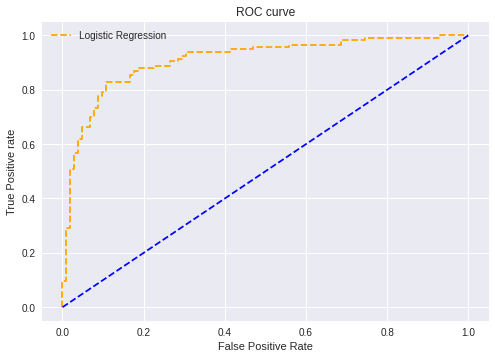

In [ ]:
accuracy_log_test = []
accuracy_log_train = []
classif_log_test=[]
classif_log_train=[]

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:30])
                train_data_y.append(data_g[j][w][30])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:30])
                test_data_y.append(data_g[j][w][30])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn 
    clf = LogisticRegression(random_state = 0)
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr1, tpr1, thresh1 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    #calculating and appending accuracies
    acc1_log = accuracy_score(test_data_yn, test_pred_y_log)
    accuracy_log_test.append(acc1_log)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))
    print("------------------TRAINING-----------------")
    acc2_log = accuracy_score(train_data_yn, train_pred_y_log)
    accuracy_log_train.append(acc2_log)
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(train_data_yn, train_pred_y_log, target_names=target_names))


In [ ]:
#Creating the Confusion matrix
cm= confusion_matrix(test_data_yn, test_pred_y_log)
cm

array([[91, 11],
       [20, 96]])

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_log_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_log_train))


Mean accuracy for test set =  0.8577981651376146
Mean accuracy for train set =  0.7983257229832572


# **NAIVE BAYES**

0.8139790398918187
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.75      0.41      0.53       102
Covid Positive       0.63      0.88      0.73       116

      accuracy                           0.66       218
     macro avg       0.69      0.65      0.63       218
  weighted avg       0.69      0.66      0.64       218



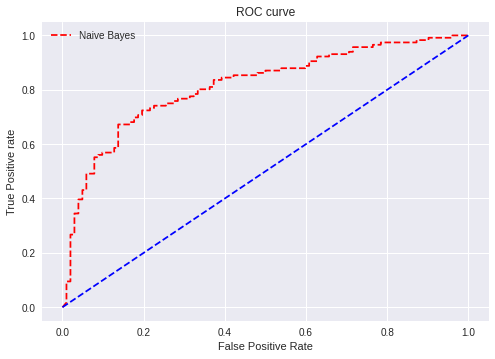

In [ ]:
accuracy_nb_test = []
accuracy_nb_train = []

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:30])
                train_data_y.append(data_g[j][w][30])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:30])
                test_data_y.append(data_g[j][w][30])
       
    #convert into array         
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = GaussianNB()
    clf.fit(train_data_xn, train_data_yn)

    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr2, tpr2, thresh2 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_nb = clf.predict(test_data_xn)
    train_pred_y_nb = clf.predict(train_data_xn)

    #calculating and appending accuracies
    acc1_nb = accuracy_score(test_data_yn, test_pred_y_nb)
    accuracy_nb_test.append(acc1_nb)
    
    acc2_nb = accuracy_score(train_data_yn, train_pred_y_nb)
    accuracy_nb_train.append(acc2_nb)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_nb_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_nb_train))

Mean accuracy for test set =  0.6605504587155964
Mean accuracy for train set =  0.665144596651446


# ***Fisher Linear Discriminant***

0.8904665314401623
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.81      0.82      0.82       102
Covid Positive       0.84      0.83      0.83       116

      accuracy                           0.83       218
     macro avg       0.82      0.83      0.83       218
  weighted avg       0.83      0.83      0.83       218



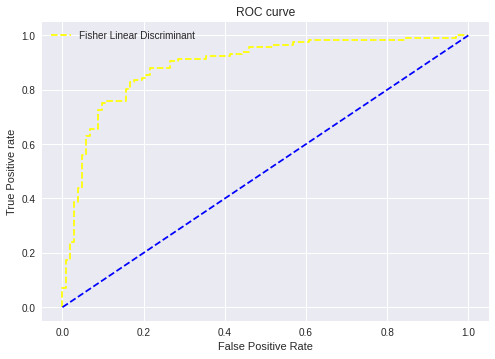

In [ ]:
accuracy_fl_test = []
accuracy_fl_train = []

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:30])
                train_data_y.append(data_g[j][w][30])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:30])
                test_data_y.append(data_g[j][w][30])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = LinearDiscriminantAnalysis()
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr3, tpr3, thresh3 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_fl = clf.predict(test_data_xn)
    train_pred_y_fl = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_fl = accuracy_score(test_data_yn, test_pred_y_fl)
    accuracy_fl_test.append(acc1_fl)
    
    acc2_fl = accuracy_score(train_data_yn, train_pred_y_fl)
    accuracy_fl_train.append(acc2_fl)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_fl_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_fl_train))

Mean accuracy for test set =  0.8256880733944955
Mean accuracy for train set =  0.7899543378995434


# **KNN**

In [ ]:
df

,Male,Female,Age,Calcium,Creatinine,Alkaline_Phosphatase,Gamma_Glutamyltransferase,Glucose,Aspartate_aminotransferase,Alanine_aminotransferase,Lactate_dehydrogenase,Urea,Leukocytes_(10^9/L),Erythrocytes,Hemoglobin,Hematocrit,Mean_corpuscular_volume,Mean_corpuscolar_hemoglobin,Mean_corpuscolar_hemoglobin_conc.,Platelets_(10^9/L),Neutrophils_(%),Lymphocytes_(%),Monocytes_(%),Eosinophils_(%),Basophils_(%),Neutrophils_count_(10^9/L),Lymphocytes_count_(10^9/L),Monocytes_count_(10^9/L),Eosinophils_count_(10^9/L),Basophils_count_(10^9/L),CoV-2
1426,0,1,-0.661610,-0.293481,-0.493415,-0.070527,-0.385672,-0.415043,-0.549677,-0.685682,-0.553550,-0.823152,-0.414975,0.651650,-2.465590,-1.864635,-4.213573,-4.780285,-3.951283,0.566127,0.260531,-0.070995,-0.420496,-0.482990,-0.883555,-0.212495,-0.070395,-0.226002,-0.464502,-0.410345,1
169,1,0,-1.326693,0.618015,-0.145048,-0.539444,-0.370900,-0.691331,-0.372071,-0.004106,-0.631521,-0.517077,-0.436547,1.099732,1.353670,1.262554,-0.040399,0.253203,0.630960,0.268935,-2.191356,2.200763,0.996158,0.504951,0.591746,-0.793410,1.609898,0.328684,0.229384,-0.410345,0
31,1,0,-1.019732,-0.010603,0.193072,-0.231499,0.345537,-0.225094,0.002875,0.395438,-0.140070,NaN,-1.277840,1.733940,1.941248,1.618929,-0.522192,0.142981,1.450549,-0.781853,-0.742856,0.855882,0.326467,-0.544736,0.222920,-1.039182,-0.595487,-0.595793,-0.464502,-0.410345,0
913,1,0,-0.968571,-0.220142,0.608037,-0.525447,-0.023760,0.776452,-0.293135,1.406051,-0.759109,NaN,-0.551596,-2.838792,-2.563520,-2.912971,0.790929,1.049254,0.804812,-2.239512,0.371180,-0.564724,0.438082,-0.380080,0.837629,-0.346553,-0.700505,-0.287634,-0.464502,-0.410345,0
402,1,0,-0.712771,0.094167,0.070119,NaN,NaN,-0.380507,-0.332603,-0.286138,-0.555913,-0.517077,-0.501262,0.989435,1.255740,0.995273,-0.252955,0.289944,1.152517,-0.474047,-0.946552,0.392444,2.077967,-0.174259,1.698221,-0.592324,0.139642,0.698475,-0.464502,2.110581,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,1,0,-1.531334,0.743738,-0.278247,-0.189506,NaN,-0.017878,-0.372071,-0.262635,-0.754383,-0.446444,-0.307117,0.741267,0.668162,0.407254,-0.748918,-0.187686,1.078009,0.152180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1051,1,0,1.180156,-0.283004,-0.196279,NaN,-0.215795,0.275679,-0.036593,-0.356646,0.325391,NaN,-0.382618,-0.409959,-0.164241,-0.287676,0.235923,0.418537,0.481944,-1.270098,1.309184,-1.288657,-0.523525,-0.482990,-1.252380,-0.078438,-1.120578,-0.410897,-0.464502,-0.410345,1
490,0,1,0.105792,-0.115372,-0.268001,NaN,NaN,-0.604991,-0.332603,-0.427154,NaN,NaN,-0.846408,-0.141110,0.521267,0.549804,1.192423,1.061501,0.109404,-0.060100,-1.210601,1.673715,-0.394739,-0.544736,0.222920,-0.838096,0.454697,-0.595793,-0.464502,-0.410345,1
578,1,0,1.384797,-0.262050,0.838574,1.154258,0.581888,-0.397775,-0.372071,-0.521164,-0.045560,2.214063,0.275316,-0.720169,-1.584222,-0.661870,0.214667,-1.620577,-4.137553,-0.304222,0.147367,-1.006959,1.099188,3.036549,-0.145905,0.212019,-0.595487,1.068266,3.698818,-0.410345,0


In [ ]:
y=df[['CoV-2']] 
y

,CoV-2
1426,1
169,0
31,0
913,0
402,1
...,...
701,0
1051,1
490,1
578,0


In [ ]:
x=df.drop(['CoV-2'], axis = 1)
x

,Male,Female,Age,Calcium,Creatinine,Alkaline_Phosphatase,Gamma_Glutamyltransferase,Glucose,Aspartate_aminotransferase,Alanine_aminotransferase,Lactate_dehydrogenase,Urea,Leukocytes_(10^9/L),Erythrocytes,Hemoglobin,Hematocrit,Mean_corpuscular_volume,Mean_corpuscolar_hemoglobin,Mean_corpuscolar_hemoglobin_conc.,Platelets_(10^9/L),Neutrophils_(%),Lymphocytes_(%),Monocytes_(%),Eosinophils_(%),Basophils_(%),Neutrophils_count_(10^9/L),Lymphocytes_count_(10^9/L),Monocytes_count_(10^9/L),Eosinophils_count_(10^9/L),Basophils_count_(10^9/L)
1426,0,1,-0.661610,-0.293481,-0.493415,-0.070527,-0.385672,-0.415043,-0.549677,-0.685682,-0.553550,-0.823152,-0.414975,0.651650,-2.465590,-1.864635,-4.213573,-4.780285,-3.951283,0.566127,0.260531,-0.070995,-0.420496,-0.482990,-0.883555,-0.212495,-0.070395,-0.226002,-0.464502,-0.410345
169,1,0,-1.326693,0.618015,-0.145048,-0.539444,-0.370900,-0.691331,-0.372071,-0.004106,-0.631521,-0.517077,-0.436547,1.099732,1.353670,1.262554,-0.040399,0.253203,0.630960,0.268935,-2.191356,2.200763,0.996158,0.504951,0.591746,-0.793410,1.609898,0.328684,0.229384,-0.410345
31,1,0,-1.019732,-0.010603,0.193072,-0.231499,0.345537,-0.225094,0.002875,0.395438,-0.140070,NaN,-1.277840,1.733940,1.941248,1.618929,-0.522192,0.142981,1.450549,-0.781853,-0.742856,0.855882,0.326467,-0.544736,0.222920,-1.039182,-0.595487,-0.595793,-0.464502,-0.410345
913,1,0,-0.968571,-0.220142,0.608037,-0.525447,-0.023760,0.776452,-0.293135,1.406051,-0.759109,NaN,-0.551596,-2.838792,-2.563520,-2.912971,0.790929,1.049254,0.804812,-2.239512,0.371180,-0.564724,0.438082,-0.380080,0.837629,-0.346553,-0.700505,-0.287634,-0.464502,-0.410345
402,1,0,-0.712771,0.094167,0.070119,NaN,NaN,-0.380507,-0.332603,-0.286138,-0.555913,-0.517077,-0.501262,0.989435,1.255740,0.995273,-0.252955,0.289944,1.152517,-0.474047,-0.946552,0.392444,2.077967,-0.174259,1.698221,-0.592324,0.139642,0.698475,-0.464502,2.110581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,1,0,-1.531334,0.743738,-0.278247,-0.189506,NaN,-0.017878,-0.372071,-0.262635,-0.754383,-0.446444,-0.307117,0.741267,0.668162,0.407254,-0.748918,-0.187686,1.078009,0.152180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1051,1,0,1.180156,-0.283004,-0.196279,NaN,-0.215795,0.275679,-0.036593,-0.356646,0.325391,NaN,-0.382618,-0.409959,-0.164241,-0.287676,0.235923,0.418537,0.481944,-1.270098,1.309184,-1.288657,-0.523525,-0.482990,-1.252380,-0.078438,-1.120578,-0.410897,-0.464502,-0.410345
490,0,1,0.105792,-0.115372,-0.268001,NaN,NaN,-0.604991,-0.332603,-0.427154,NaN,NaN,-0.846408,-0.141110,0.521267,0.549804,1.192423,1.061501,0.109404,-0.060100,-1.210601,1.673715,-0.394739,-0.544736,0.222920,-0.838096,0.454697,-0.595793,-0.464502,-0.410345
578,1,0,1.384797,-0.262050,0.838574,1.154258,0.581888,-0.397775,-0.372071,-0.521164,-0.045560,2.214063,0.275316,-0.720169,-1.584222,-0.661870,0.214667,-1.620577,-4.137553,-0.304222,0.147367,-1.006959,1.099188,3.036549,-0.145905,0.212019,-0.595487,1.068266,3.698818,-0.410345


In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(x)
#X_2 = X
SimpleImputer()
X = imp.transform(x)
X

array([[ 0.00000000e+00,  1.00000000e+00, -6.61610356e-01, ...,
        -2.26002080e-01, -4.64502329e-01, -4.10345075e-01],
       [ 1.00000000e+00,  0.00000000e+00, -1.32669278e+00, ...,
         3.28684043e-01,  2.29384434e-01, -4.10345075e-01],
       [ 1.00000000e+00,  0.00000000e+00, -1.01973166e+00, ...,
        -5.95792829e-01, -4.64502329e-01, -4.10345075e-01],
       ...,
       [ 0.00000000e+00,  1.00000000e+00,  1.05792437e-01, ...,
        -5.95792829e-01, -4.64502329e-01, -4.10345075e-01],
       [ 1.00000000e+00,  0.00000000e+00,  1.38479709e+00, ...,
         1.06826554e+00,  3.69881825e+00, -4.10345075e-01],
       [ 1.00000000e+00,  0.00000000e+00,  3.47206467e-03, ...,
        -4.10897455e-01, -4.64502329e-01, -4.10345075e-01]])

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.1, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.807249322493225


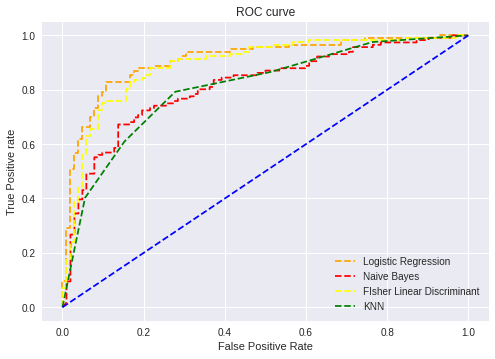

In [ ]:
#Fitting K-NN classifier to the training set
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)
#importing model from sklearn 
    
    #predict class
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve

    # roc curve for models
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

    # matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='FIsher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [ ]:
#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred)

In [ ]:
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 75.97%
The Confusion Matrix is:
  [[52 20]
 [17 65]]
                precision    recall  f1-score   support

Covid Negative       0.75      0.72      0.74        72
Covid Positive       0.76      0.79      0.78        82

      accuracy                           0.76       154
     macro avg       0.76      0.76      0.76       154
  weighted avg       0.76      0.76      0.76       154

